# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [3]:
# Test
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query API call
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = url + 'appid=' + weather_api_key + '&units=' + units + '&q='

In [5]:
# Test
print(city)
requests.get(query_url + city).json()

punta arenas


{'coord': {'lon': -70.9167, 'lat': -53.15},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 53.29,
  'feels_like': 49.6,
  'temp_min': 53.01,
  'temp_max': 53.6,
  'pressure': 1014,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 150},
 'clouds': {'all': 75},
 'dt': 1612950650,
 'sys': {'type': 1,
  'id': 8487,
  'country': 'CL',
  'sunrise': 1612949571,
  'sunset': 1613002986},
 'timezone': -10800,
 'id': 3874787,
 'name': 'Punta Arenas',
 'cod': 200}

In [6]:
# Create empty lists to hold loop response data
city_names = []
countries = []
latitudes = []
longitudes = []
max_temps = []
humid_pcts = []
cloud_pcts = []
wind_speeds = []
date_time_unix = []

# Set start for loop count
count = 1

In [7]:
for city in cities:
    
    # Loop to find city weather data in .json format
    weather_response = requests.get(query_url + city).json()

    # Print count and total count with city name
    print(f'Response {count} of {len(cities)}: {city}')
    # Test
    # print(weather_response)
        
    try:
        # Add data to lists
        city_names.append(weather_response['name'])
        countries.append(weather_response['sys']['country'])
        latitudes.append(weather_response['coord']['lat'])
        longitudes.append(weather_response['coord']['lon'])
        max_temps.append(weather_response['main']['temp_max'])
        humid_pcts.append(weather_response['main']['humidity'])
        cloud_pcts.append(weather_response['clouds']['all'])
        wind_speeds.append(weather_response['wind']['speed'])
        date_time_unix.append(weather_response['dt'])
        
    except KeyError:
        # Print for city match error
        print(f'{city} data not found!')
        
    print(f'---------------------------------------')
    count = count + 1

Response 1 of 650: souillac
---------------------------------------
Response 2 of 650: bluff
---------------------------------------
Response 3 of 650: avarua
---------------------------------------
Response 4 of 650: busselton
---------------------------------------
Response 5 of 650: avera
---------------------------------------
Response 6 of 650: qaanaaq
---------------------------------------
Response 7 of 650: hobart
---------------------------------------
Response 8 of 650: belushya guba
belushya guba data not found!
---------------------------------------
Response 9 of 650: ust-nera
---------------------------------------
Response 10 of 650: achutupo
---------------------------------------
Response 11 of 650: hegang
---------------------------------------
Response 12 of 650: tautira
---------------------------------------
Response 13 of 650: bengkulu
---------------------------------------
Response 14 of 650: manacapuru
---------------------------------------
Response 15 of 650:

Response 116 of 650: alyangula
---------------------------------------
Response 117 of 650: launceston
---------------------------------------
Response 118 of 650: carnarvon
---------------------------------------
Response 119 of 650: kamenka
---------------------------------------
Response 120 of 650: barentsburg
barentsburg data not found!
---------------------------------------
Response 121 of 650: camabatela
---------------------------------------
Response 122 of 650: barao de melgaco
---------------------------------------
Response 123 of 650: canyon
---------------------------------------
Response 124 of 650: mataura
---------------------------------------
Response 125 of 650: itaqui
---------------------------------------
Response 126 of 650: houma
---------------------------------------
Response 127 of 650: ballstad
ballstad data not found!
---------------------------------------
Response 128 of 650: poole
---------------------------------------
Response 129 of 650: dingle
----

Response 230 of 650: show low
---------------------------------------
Response 231 of 650: bethel
---------------------------------------
Response 232 of 650: beringovskiy
---------------------------------------
Response 233 of 650: coihaique
---------------------------------------
Response 234 of 650: verkhnyachka
---------------------------------------
Response 235 of 650: praia
---------------------------------------
Response 236 of 650: vardo
---------------------------------------
Response 237 of 650: high prairie
---------------------------------------
Response 238 of 650: coquimbo
---------------------------------------
Response 239 of 650: nhulunbuy
---------------------------------------
Response 240 of 650: qaqortoq
---------------------------------------
Response 241 of 650: caravelas
---------------------------------------
Response 242 of 650: darfo
---------------------------------------
Response 243 of 650: hovd
---------------------------------------
Response 244 of 650:

Response 347 of 650: honningsvag
---------------------------------------
Response 348 of 650: casper
---------------------------------------
Response 349 of 650: aranos
---------------------------------------
Response 350 of 650: verkhnevilyuysk
---------------------------------------
Response 351 of 650: panaba
---------------------------------------
Response 352 of 650: budogoshch
---------------------------------------
Response 353 of 650: grand forks
---------------------------------------
Response 354 of 650: uwayl
uwayl data not found!
---------------------------------------
Response 355 of 650: kathu
---------------------------------------
Response 356 of 650: veraval
---------------------------------------
Response 357 of 650: swift current
---------------------------------------
Response 358 of 650: akonolinga
---------------------------------------
Response 359 of 650: fortuna
---------------------------------------
Response 360 of 650: vagur
---------------------------------

Response 463 of 650: businga
---------------------------------------
Response 464 of 650: zary
---------------------------------------
Response 465 of 650: kuruman
---------------------------------------
Response 466 of 650: chapais
---------------------------------------
Response 467 of 650: deputatskiy
---------------------------------------
Response 468 of 650: riviere-au-renard
---------------------------------------
Response 469 of 650: darhan
---------------------------------------
Response 470 of 650: petropavlovsk-kamchatskiy
---------------------------------------
Response 471 of 650: hirara
---------------------------------------
Response 472 of 650: vestmannaeyjar
---------------------------------------
Response 473 of 650: mme
mme data not found!
---------------------------------------
Response 474 of 650: tura
---------------------------------------
Response 475 of 650: san ignacio
---------------------------------------
Response 476 of 650: dera din panah
dera din panah d

Response 575 of 650: bargal
bargal data not found!
---------------------------------------
Response 576 of 650: inderborskiy
inderborskiy data not found!
---------------------------------------
Response 577 of 650: dianopolis
dianopolis data not found!
---------------------------------------
Response 578 of 650: tabukiniberu
tabukiniberu data not found!
---------------------------------------
Response 579 of 650: uthal
---------------------------------------
Response 580 of 650: kita
---------------------------------------
Response 581 of 650: moron
---------------------------------------
Response 582 of 650: majene
---------------------------------------
Response 583 of 650: kingaroy
---------------------------------------
Response 584 of 650: villanueva de la serena
---------------------------------------
Response 585 of 650: naze
---------------------------------------
Response 586 of 650: vestmanna
---------------------------------------
Response 587 of 650: port keats
------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    'City Name': city_names,
    'Country': countries,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Max Temperature (*F)': max_temps,
    'Humidity (%)': humid_pcts,
    'Cloudiness (%)': cloud_pcts,
    'Wind Speed (MPH)': wind_speeds,
    'Datetime': date_time_unix
}

weather_df = pd.DataFrame(weather_dict)

In [9]:
# Drop skipped cities
clean_weather_df = weather_df.dropna()
clean_weather_df.count()

City Name               592
Country                 592
Latitude                592
Longitude               592
Max Temperature (*F)    592
Humidity (%)            592
Cloudiness (%)          592
Wind Speed (MPH)        592
Datetime                592
dtype: int64

In [10]:
# Convert unix datetime stamp to UTC
clean_weather_df['Datetime'] = pd.to_datetime(clean_weather_df['Datetime'], unit='s')

In [11]:
# Display the DataFrame
clean_weather_df

,City Name,Country,Latitude,Longitude,Max Temperature (*F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Datetime
0,Souillac,MU,-20.5167,57.5167,86.00,62,40,12.66,2021-02-10 09:52:23
1,Bluff,NZ,-46.6000,168.3333,54.14,89,100,32.75,2021-02-10 09:52:03
2,Avarua,CK,-21.2078,-159.7750,77.00,94,100,1.14,2021-02-10 09:52:20
3,Busselton,AU,-33.6500,115.3333,64.00,80,21,3.00,2021-02-10 09:52:00
4,Avera,US,33.1940,-82.5271,55.40,92,90,3.44,2021-02-10 09:53:27
...,...,...,...,...,...,...,...,...,...
587,Dubrovnik,HR,42.6481,18.0922,55.40,88,75,20.71,2021-02-10 09:51:41
588,Fairhope,US,30.5230,-87.9033,57.99,100,90,6.49,2021-02-10 09:50:58
589,Churapcha,RU,62.0025,132.4325,-16.74,88,0,2.39,2021-02-10 09:55:38
590,Baijiantan,CN,45.6333,85.1833,28.17,94,74,4.05,2021-02-10 09:55:38


In [14]:
# Export to .csv
clean_weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
try:
    humid_pcts_to_omit = clean_weather_df.loc[clean_weather_df[humid_pcts] > 100]
    
except KeyError:
    humid_pcts_to_omit = 'No cities with humidity > 100%'

In [16]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f'Skip: {humid_pcts_to_omit}')

Skip: No cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature (F) Plot

In [17]:
# Find last date from current weather data
last_weather_api_date = (clean_weather_df['Datetime'].max()).date()

# Format timestamp to date for plot title date of analysis
plot_date = last_weather_api_date.strftime('%m-%d-%Y')
plot_date

'02-10-2021'

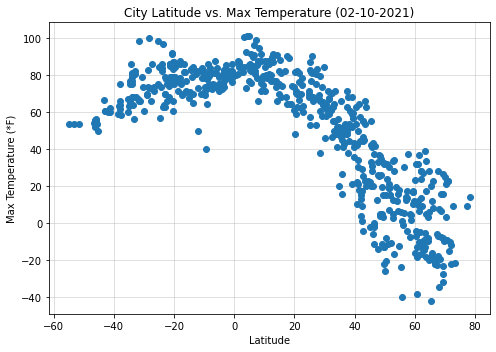

In [18]:
# Title and plot size
title = 'City Latitude vs. Max Temperature'
plt.figure(figsize=(7,5))

# Plot
plt.scatter(latitudes, max_temps, zorder=3)

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

The plot shows highest temperatures in cities closest to the equator (latitude 0) and lowest temperatures in cities further from the equator. The gradual decrease in both northern and southern hemispheres demonstrates a strong correlation between latitudes and max temperatures.

## Latitude vs. Humidity (%) Plot

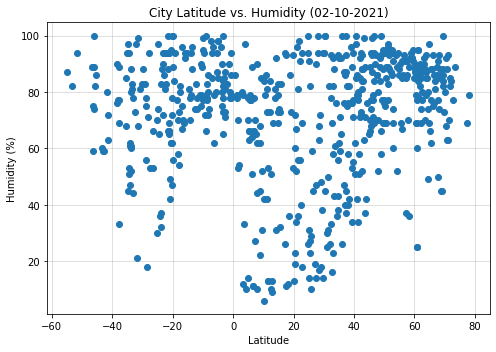

In [19]:
# Title and plot size
title = 'City Latitude vs. Humidity'
plt.figure(figsize=(7,5))

# Plot
plt.scatter(latitudes, humid_pcts, zorder=3)

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

The plot shows no observable correlation between city latitude and humidity. The majority of humidity percentages seem to fall between 60-100% with a concentration of higher humidities near the equator (latitude 0).

## Latitude vs. Cloudiness (%) Plot

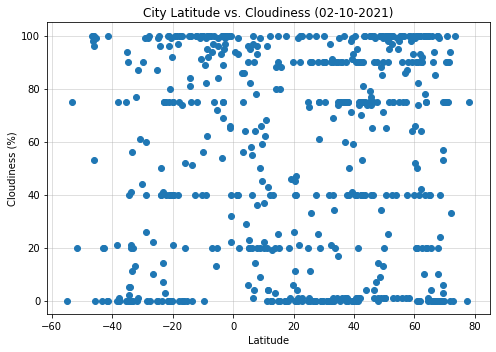

In [20]:
# Title and plot size
title = 'City Latitude vs. Cloudiness'
plt.figure(figsize=(7,5))

# Plot
plt.scatter(latitudes, cloud_pcts, zorder=3)

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

The plot shows no observable correlation between city latitude and cloudiness. We do see horizontal points of data along the y-axis gridlines (0, 20, 40, 60, 80, 100) which may be a result of how cloudiness percentages are reported.

## Latitude vs. Wind Speed (MPH) Plot

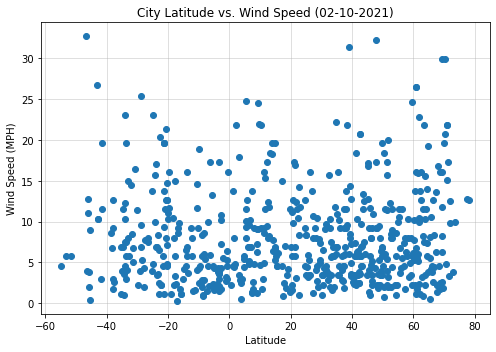

In [21]:
# Title and plot size
title = 'City Latitude vs. Wind Speed'
plt.figure(figsize=(7,5))

# Plot
plt.scatter(latitudes, wind_speeds, zorder=3)

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

The plot shows no observable correlation between city latitude and wind speed. However, the majority of wind speeds fall between 0-10 MPH with the highest wind speeds observed in cities further from the equator.

## Linear Regression

In [22]:
# Create separate DataFrams for Northern and Southern Hemispheres
north_hemi_df = clean_weather_df[clean_weather_df['Latitude'] > 0]
south_hemi_df = clean_weather_df[clean_weather_df['Latitude'] < 0]
# print(north_hemi_df.count())
# print('Southern Hemisphere:')

In [23]:
# Set latitude equal to x value for plotting
lats_n = north_hemi_df['Latitude']
lats_s = south_hemi_df['Latitude']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

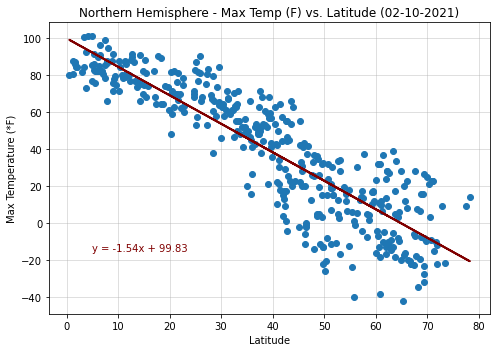

In [40]:
# Title, y-value, and plot size
title = 'Northern Hemisphere - Max Temp (F) vs. Latitude'
temps_n = north_hemi_df['Max Temperature (*F)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_n, temps_n, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_n, temps_n)
n_regress_values1 = lats_n * slope + intercept
n_line_eq1 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_n, n_regress_values1, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(n_line_eq1, (5,-15), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [25]:
n_temp_corr = st.pearsonr(lats_n, temps_n)
print(f'R-squared = {round(n_temp_corr[0], 2)}')

R-squared = -0.88


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

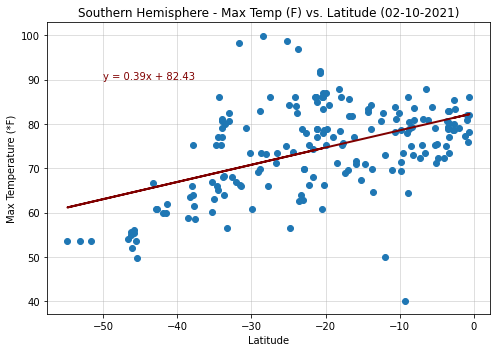

In [42]:
# Title, y-value, and plot size
title = 'Southern Hemisphere - Max Temp (F) vs. Latitude'
temps_s = south_hemi_df['Max Temperature (*F)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_s, temps_s, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_s, temps_s)
s_regress_values1 = lats_s * slope + intercept
s_line_eq1 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_s, s_regress_values1, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(s_line_eq1, (-50,90), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [27]:
s_temp_corr = st.pearsonr(lats_s, temps_s)
print(f'R-squared = {round(s_temp_corr[0], 2)}')

R-squared = 0.5


#### Temperature Analysis
* The pair of plots model the relationship between city latitudes and max temperatures. We see a negative correlation in the Northern Hemisphere because latitudes are higher values as we move further north while temperatures are generally lower. We see the opposite correlation in the Southern Hemisphere because latitude values are negative while temperatures have the same measure. 
* In both Hemispheres, max temps are generally lower when latitudes are further from the equator or latitude 0. 
* Plots for both the Northern and Southern Hemispheres demonstrate a strong correlation between temperature and distance from the equator. The Northern Hemisphere shows a stronger correlation, possibly because there are more countries in the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

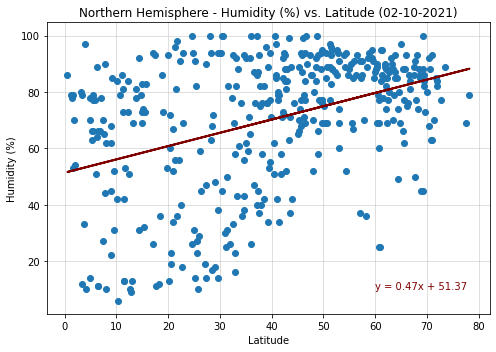

In [44]:
# Title, y-value, and plot size
title = 'Northern Hemisphere - Humidity (%) vs. Latitude'
humid_n = north_hemi_df['Humidity (%)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_n, humid_n, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_n, humid_n)
n_regress_values2 = lats_n * slope + intercept
n_line_eq2 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_n, n_regress_values2, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(n_line_eq2, (60,10), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [29]:
n_humid_corr = st.pearsonr(lats_n, humid_n)
print(f'R-squared = {round(n_humid_corr[0], 2)}')

R-squared = 0.4


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

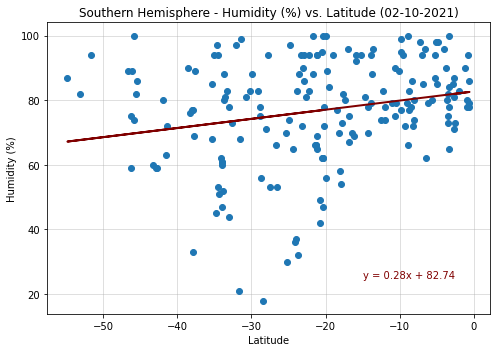

In [30]:
# Title, y-value, and plot size
title = 'Southern Hemisphere - Humidity (%) vs. Latitude'
humid_s = south_hemi_df['Humidity (%)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_s, humid_s, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_s, humid_s)
s_regress_values2 = lats_s * slope + intercept
s_line_eq2 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_s, s_regress_values2, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(s_line_eq2, (-15,25), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [31]:
s_humid_corr = st.pearsonr(lats_s, humid_s)
print(f'R-squared = {round(s_humid_corr[0], 2)}')

R-squared = 0.23


#### Humidity Analysis
* The pair of plots model the relationship between city latitudes and humidity percentages. The plots show us there is little correlation between the two factors in both Hemispheres.
* We see positive correlations in both the Northern and Southern Hemispheres because higher and lower altitudes are unrelated to a city's latitude/distance from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

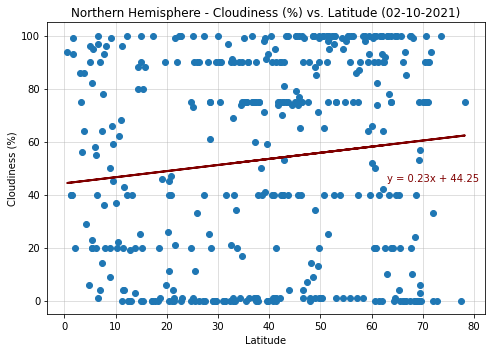

In [50]:
# Title, y-value, and plot size
title = 'Northern Hemisphere - Cloudiness (%) vs. Latitude'
cloud_n = north_hemi_df['Cloudiness (%)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_n, cloud_n, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_n, cloud_n)
n_regress_values3 = lats_n * slope + intercept
n_line_eq3 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_n, n_regress_values3, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(n_line_eq3, (63,45), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [33]:
n_cloud_corr = st.pearsonr(lats_n, cloud_n)
print(f'R-squared = {round(n_cloud_corr[0], 2)}')

R-squared = 0.12


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

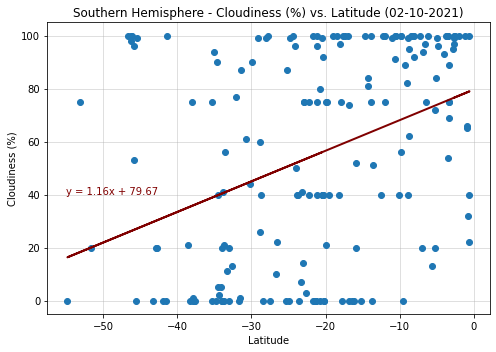

In [53]:
# Title, y-value, and plot size
title = 'Southern Hemisphere - Cloudiness (%) vs. Latitude'
cloud_s = south_hemi_df['Cloudiness (%)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_s, cloud_s, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_s, cloud_s)
s_regress_values3 = lats_s * slope + intercept
s_line_eq3 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_s, s_regress_values3, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(s_line_eq3, (-55,40), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [35]:
s_cloud_corr = st.pearsonr(lats_s, cloud_s)
print(f'R-squared = {round(s_cloud_corr[0], 2)}')

R-squared = 0.38


#### Cloudiness Analysis
* The pair of plots model the relationship between city latitudes and cloudiness percentages. The plots show us there is a low correlation between the two factors in both Hemispheres.
* Both the Northern and Southern Hemispheres show positive correlations telling us latitude/distance from the equator is not a good indicator for cloudiness and that the two do not correlate.
* The positive correlation we see in the Southern Hemisphere may be resulting from a cluster of cities in similar latitudes in our dataset. The positive correlation may also be higher in the Southern Hemisphere because there are fewer cities in the Southern Hemisphere as well as in the dataset meaning each datapoint or outlier has a greater affect on the linear regression model.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

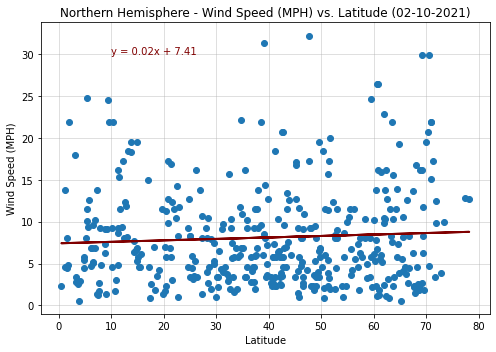

In [57]:
# Title, y-value, and plot size
title = 'Northern Hemisphere - Wind Speed (MPH) vs. Latitude'
wind_n = north_hemi_df['Wind Speed (MPH)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_n, wind_n, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_n, wind_n)
n_regress_values4 = lats_n * slope + intercept
n_line_eq4 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_n, n_regress_values4, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(n_line_eq4, (10,30), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [37]:
n_wind_corr = st.pearsonr(lats_n, wind_n)
print(f'R-squared = {round(n_wind_corr[0], 2)}')

R-squared = 0.06


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

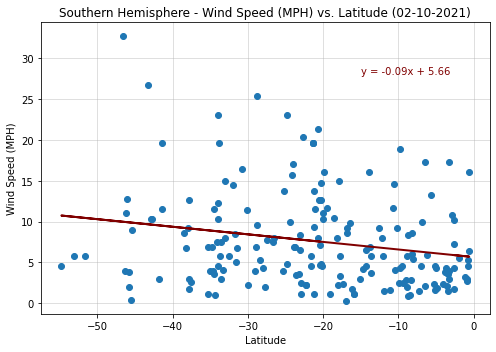

In [59]:
# Title, y-value, and plot size
title = 'Southern Hemisphere - Wind Speed (MPH) vs. Latitude'
wind_s = south_hemi_df['Wind Speed (MPH)']
plt.figure(figsize=(7,5))

# Plot
plt.scatter(lats_s, wind_s, zorder=3)

# Run linear regression, get regression values, and create linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats_s, wind_s)
s_regress_values4 = lats_s * slope + intercept
s_line_eq4 = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

# Plot linear regression
plt.plot(lats_s, s_regress_values4, 'maroon', lw=2, zorder=3)

# Annotate
plt.annotate(s_line_eq4, (-15,28), color="maroon")

# Label
plt.title(f'{title} ({plot_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Format
plt.grid(zorder=0, alpha=0.5)
plt.tight_layout()

# Save plotted figure as .png
plt.savefig('Images/' + title + '.png', bbox_inches='tight')

plt.show()

In [39]:
s_wind_corr = st.pearsonr(lats_s, wind_s)
print(f'R-squared = {round(s_wind_corr[0], 2)}')

R-squared = -0.21


#### Wind Speed Analysis
* The pair of plots model the relationship between city latitudes and wind speeds. The plots show us there is little correlation between the two factors in both Hemispheres.
* There is a slight decrease in wind speeds for cities closer to the equator, but the correlation is not strong enough to assume any causation between the two factors.